In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from plotting_functions import modify_plot, save_figure

styles = ['science']
prefix = 'stylelib/'
sufix = '.mplstyle'

for i in range(len(styles)):
    styles[i] = prefix + styles[i] + sufix

plt.style.use(styles)

In [2]:
%%time
# Path the to file that we want to load
folder = 'data/'
file = 'FAQUAD_DQD_2HH_Decoherence_reduced'
extension = '.npy'
file_dic = folder + file + extension

data = np.load(file_dic, allow_pickle=True)  # Load the data, allow_pickle enable to load a list
print(data[-1])

final_density_matrix = data[0]
tf_vec = data[1]
Gamma_vec = data[2]

n_tf = len(tf_vec)
n_Gamma = len(Gamma_vec)

['final_density_matrix', 'tf_vec', 'Gamma_vec', 'parameters']
Wall time: 454 ms


In [3]:
%%time
# Path the to file that we want to load
folder = 'data/'
file = 'FAQUAD_DQD_2HH_Systematic_Error_reduced'
extension = '.npy'
file_dic = folder + file + extension

data2 = np.load(file_dic, allow_pickle=True)  # Load the data, allow_pickle enable to load a list
print(data[-1])

final_density_matrix2 = data2[0]
tf_vec2 = data2[1]
Gamma_vec2 = data2[2]

n_tf2 = len(tf_vec2)
n_Gamma2 = len(Gamma_vec2)

['final_density_matrix', 'tf_vec', 'Gamma_vec', 'parameters']
Wall time: 154 ms


In [4]:
probabilities=np.zeros([3,n_tf*n_Gamma])

for i in range (0,n_tf*n_Gamma):
    temp=final_density_matrix[i]
    probabilities[:,i]=np.abs(np.diag(temp))

fidelity=probabilities[1,:].reshape([n_tf,n_Gamma])

probabilities2=np.zeros([3,n_tf2*n_Gamma2])

for i in range (0,n_tf2*n_Gamma2):
    temp=final_density_matrix2[i]
    probabilities2[:,i]=np.abs(np.diag(temp))

fidelity2=probabilities2[1,:].reshape([n_tf2,n_Gamma2])

<IPython.core.display.Javascript object>


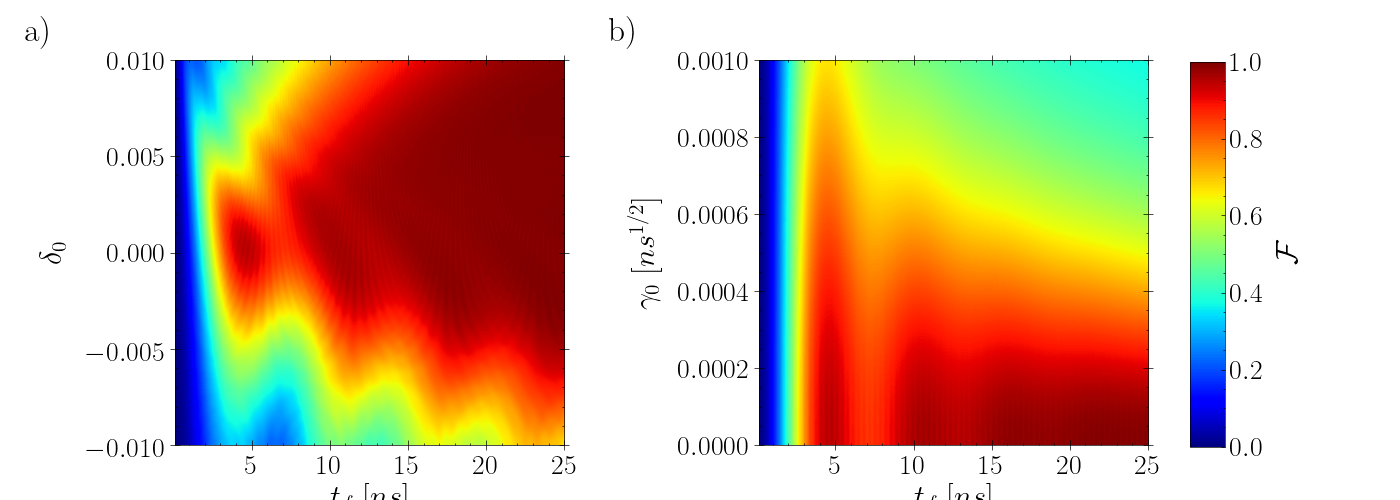

Figure saved


In [39]:
save=True

ticks=20
labels=22
text=24

fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=[14, 5])
fig.subplots_adjust(wspace=0.5)

pos = ax1.imshow(fidelity2.transpose(), origin='lower', cmap='jet', aspect='auto',
                 extent=[tf_vec2[0], tf_vec2[-1], Gamma_vec2[0], Gamma_vec2[-1]], vmin=0, vmax=1, interpolation='quadric')

# cbar1 = fig.colorbar(pos1, ax=ax1)
# cbar1.set_label(r'$\mathcal{F}$', fontsize=labels, labelpad=10)
# cbar1.ax.tick_params(labelsize=ticks) 

ax1.set_xlabel(r'$t_f\; [ns]$')
ax1.set_ylabel(r'$\delta_0$', labelpad=10)


pos = ax2.imshow(fidelity.transpose(), origin='lower', cmap='jet', aspect='auto',
                 extent=[tf_vec[0], tf_vec[-1], Gamma_vec[0], Gamma_vec[-1]], vmin=0, vmax=1, interpolation='quadric')
# cbar2 = fig.colorbar(pos2, ax=ax2)
# cbar2.set_label(r'$\mathcal{F}$', fontsize=labels, labelpad=10)
# cbar2.ax.tick_params(labelsize=ticks) 

ax2.set_xlabel(r'$t_f\; [ns]$')
ax2.set_ylabel(r'$\gamma_0 \; [ns^{1/2}]$', labelpad=10);


fig.subplots_adjust(right=0.82)
cbar_ax = fig.add_axes([0.85, 0.107, 0.025, 0.77])
cbar = fig.colorbar(pos, cax=cbar_ax)
cbar.set_label(r'$\mathcal{F}$', fontsize=labels, labelpad=10)
cbar.ax.tick_params(labelsize=ticks) 


if save:
    
    ax2.text(-9.5,0.00105,'b)',{'fontsize':text})
    ax1.text(-9.5,0.011,'a)',{'fontsize':text})
    
    modify_plot(ax1, tick_direction='inout', x_ticks_vector=np.arange(0,26,5),
                label_size=labels, tick_label_size=ticks)
      
    modify_plot(ax2, tick_direction='inout', x_ticks_vector=np.arange(0,26,5),
                label_size=labels, tick_label_size=ticks)

    
    # plt.tight_layout()
    
    save_figure(fig,'FAQUAD_DQD_Decoherence', overwrite=save,extension='pdf')